# SymPy:
Symbolic computation deals with the computation of mathematical objects symbolically. This means that the mathematical objects are represented exactly, not approximately, and mathematical expressions with unevaluated variables are left in symbolic form.

In [139]:
from __future__ import division
import sympy as sym

**Symbols:** In Python, variables have no meaning until they are defined. SymPy is no different. Unlike many symbolic manipulation systems you may have used, in SymPy, variables are not defined automatically. To define variables, we must use `symbols`.

In [140]:
x, y = sym.symbols('x, y')

In [141]:
(x+y)**2

**Equals Signs:** In SymPy, `==` represents exact structural equality testing. This means that `a == b` means that we are asking if $a=b$. We always get a `bool` as the result of `==`.

In [144]:
x + 1 == 4

False

There is also a method called `equals` that tests if two expressions are equal by evaluating them numerically at random points.

In [146]:
a = (x + 1)**2
b = x**2 + 2*x + 1
a.equals(b)

True

- There is a separate object, called `Eq` method, which can be used to create symbolic equalities.
\begin{align*}
2x + 3y = 8 \\
3x + y = 5
\end{align*}

In [175]:
eq1 = sym.Eq(2*x+3*y,8)
eq2 = sym.Eq(3*x+y,5)
display(eq1, eq2)

## Basic Operation-
**Substitution :** To change the value of a $x$ - Symbol in an expression, use `subs`. One advantage of using a symbolic computation system like SymPy is that we can build a symbolic representation for expr, and then substitute x with values. 

SymPy expressions are immutable. No function will change them in-place.

In [147]:
exp = x + 1
exp

In [148]:
exp.subs(x,4)
exp.subs(x,y)

In [149]:
expr = sym.sin(2*x) + sym.cos(2*x)
# expand_trig function will also expand cos(2x), which we may not want.
display(sym.expand_trig(expr))
expr.subs(sym.sin(2*x), 2*sym.sin(x)*sym.cos(x))

**Converting Strings to SymPy Expressions :** The `sympify` function (that’s sympify, not to be confused with simplify) can be used to convert strings into SymPy expressions.

**`Warning:`** `sympify` uses `eval`. Don’t use it on unsanitized input.

In [150]:
expr = "sin(2*x) + cos(2*x)"
expr_n = sym.sympify(expr)
expr_n

- **evalf () -** To evaluate a numerical expression into a floating point number, use `evalf`. SymPy can evaluate floating point expressions to arbitrary precision.

In [151]:
sym.pi.evalf(3)

In [152]:
# To numerically evaluate an expression, we substitution to evalf using 
# the subs flag, which takes a dictionary of Symbol: point pairs.
expr = sym.cos(2*x)
expr.evalf(subs={x: 2.4})

- **N () -** Exact SymPy expressions can be converted to floating-point approximations (decimal numbers) using either the `evalf()` method or the `N()` function. `N(expr, <args>)` is equivalent to `sympify(expr).evalf(<args>)`.

In [153]:
display(sym.pi)
sym.N(sym.pi, 6)

- **lambdify () -** The easiest way to convert a SymPy expression to an expression that can be numerically evaluated is to use the `lambdify` function

In [154]:
import numpy 
a = numpy.arange(10) 
expr = sym.sin(x)
f = sym.lambdify(x, expr, "numpy") 
f(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

### Printing-
- To get a **STRING** form of an expression, use `str(expr)`. This is also the form that is produced by `print(expr)`.

In [155]:
from sympy import init_session
init_session() 

IPython console for SymPy 1.4 (Python 3.7.3-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.4/



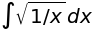

'Integral(sqrt(1/x), x)'

In [156]:
display(Integral(sqrt(1/x), x))
str(Integral(sqrt(1/x), x))

- To get the **LATEX** form of an expression, use `latex()`.

In [157]:
print(latex(Integral(sqrt(1/x), x)))

\int \sqrt{\frac{1}{x}}\, dx


## Simplification-
**simplify () -** SymPy has dozens of functions to perform various kinds of simplification. There is also one general function called `simplify()` that attempts to apply all of these functions in an intelligent way to arrive at the simplest form of an expression.

In [158]:
display(sym.simplify(sym.sin(x)**2 + sym.cos(x)**2))
display(sym.simplify((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1)))
sym.simplify(sym.gamma(x)/sym.gamma(x - 2))

But `simplify()` has a pitfall. It just applies all the major simplification operations in SymPy, and uses heuristics to determine the simplest result. For example, it doesn't `simplify` $x^2+2x+1$ into $(x+1)^2$: 

There is a function to perform this simplification, called `factor()`.

In [159]:
sym.simplify(x**2+2*x+1)

In [160]:
sym.simplify((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1))

**Polynomial/Rational Function Simplification:**

**expand () -** expand() is one of the most common simplification functions in SymPy. Although it has a lot of scopes, for now, we will consider its function in expanding polynomial expressions.

In [161]:
display(sym.expand((x + 2)*(x - 3)))

expr = (x+2)**5
display(expr.expand())

**factor () -** `factor()` takes a polynomial and factors it into irreducible factors over the rational numbers.

In [162]:
display(sym.factor(x**2*z + 4*x*y*z + 4*y**2*z))
display(sym.factor_list(x**2*z + 4*x*y*z + 4*y**2*z))

**collect () -** `collect ()`collects common powers of a term in an expression.

`collect()` is particularly useful in conjunction with the `.coeff()` method. `expr.coeff(x, n)` gives the coefficient of $x^n$ in `expr`- 

In [163]:
expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3
collect_exp = sym.collect(expr, x)
display(collect_exp)
display(collect_exp.coeff(x,2))

**apart () -** `apart()` performs a partial fraction decomposition on a rational function.

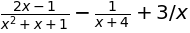

In [164]:
expr = (4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)
sym.apart(expr)

**Trigonometric Simplification:**<br>
`Note`: SymPy follows Python’s naming conventions for inverse trigonometric functions, which is to append an `a` to the front of the function’s name. For example, the inverse cosine, or arc cosine, is called `acos()`.

- **trigsimp () -** To simplify expressions using trigonometric identities, use trigsimp().

- **expand_trig () -** To expand trigonometric functions, that is, apply the sum or double angle identities, use expand_trig().

Trigsimp():


Expand_trig():


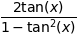

In [165]:
#trigsimp() tends to make trigonometric expressions smaller
print('Trigsimp():')
display(trigsimp(sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4))
display(trigsimp(cosh(x)**2 + sinh(x)**2))
#expand_trig() tends to make trigonometric expressions larger
print('Expand_trig():')
display(expand_trig(sin(x + y)))
display(expand_trig(tan(2*x)))

## Calculus-

- **Derivatives -** To take derivatives, use the `diff` function.

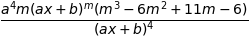

In [166]:
display(diff(cos(x), x))
display(diff(exp(x**2), x))
# nth derivative
m, n, a, b = symbols('m n a b')
expr = (a*x+b)**m
display(expr.diff((x,4)))

You can also take derivatives with respect to many variables at once. Just pass each derivative in order, using the same syntax as for single variable derivatives.

In [167]:
expr = exp(x*y*z)
display(diff(expr, x, y, 2, z, 4))

To create an unevaluated derivative, use the `Derivative` class.<br>
To evaluate an unevaluated derivative, use the `doit` method.<br>
$\frac{\partial^7}{\partial x\partial y^2\partial z^4} e^{x y z}$

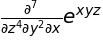

=


In [168]:
deriv = Derivative(expr, x, y, 2, z, 4)
display(deriv)
print('=')
display(deriv.doit())

- **Integrate -** <br>
To compute an integral, use the integrate function. There are two kinds of integrals, definite and indefinite.<br>
$\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} e^{- x^{2} - y^{2}}\, dx\, dy,$

In [169]:
integrate(cos(x), x)

- To compute a definite integral, pass the argument (integration_variable, lower_limit, upper_limit).<br>$\int_0^\infty e^{-x}\,dx$

In [172]:
display(integrate(exp(-x), (x, 0, oo)))
display(integrate(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo)))

- If `integrate` is unable to compute an integral, it returns an unevaluated `Integral` object.

Integral(x**x, x)


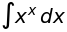

In [174]:
expr = integrate(x**x, x)
print(expr)
display(expr)

- **Limits -** SymPy can compute symbolic limits with the `limit` function. The syntax to compute is `limit(f(x), x, x0)`.
<br> `Limit` should be used instead of `subs` whenever the point of evaluation is a `singularity`. Even though SymPy has objects to represent $∞$, using them for evaluation is not reliable because they do not keep track of things like rate of growth. Also, things like $∞−∞$ and $∞/∞$ return `nan` (not-a-number). 

In [183]:
expr = x**2/exp(x)
s = expr.subs(x, oo)
e = limit(expr, x, oo)
display(s, e)

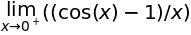

In [181]:
expr = Limit((cos(x) - 1)/x, x, 0)
display(expr)
expr.doit()

## Solvers-

- **Solving Equations Algebraically :**<br>
The main function for solving algebraic equations is `solveset`. The syntax for `solveset` is `solveset(equation, variable=None, domain=S.Complexes)` Where equations may be in the form of `Eq` instances or expressions that are assumed to be equal to zero.
  - *Please* note that there is another function called `solve` which can also be used to solve equations. The `syntax` is `solve(equations, variables)` However, it is recommended to use solveset instead.

  - When solving a single equation, the output of `solveset` is a `FiniteSet` or an `Interval` or `ImageSet` of the solutions.

In [192]:
from sympy import *
x, y, z = symbols('x y z')
init_printing(use_unicode=True)

In [196]:
s1 = solveset(x**2 - x, x)
s2 = solveset(sin(x) - 1, x, domain=S.Reals)
s3 = solveset(cos(x) - x, x)
display(s1, s2)
print(' S3 is not able to find solutions therefore a ConditionSet is returned.')
display(s3)

 S3 is not able to find solutions therefore a ConditionSet is returned.


  - In the `solveset` module, the linear system of equations is solved using `linsolve`

In [214]:
# Linear Equations Form
eq1 = sym.Eq(2*x+3*y,8)
eq2 = sym.Eq(3*x+y,5)
display(eq1, eq2)

sol, = linsolve([eq1,eq2],[x,y])
display(sol[0], sol[1])

In [213]:
#Augmented Matrix Form
sol = linsolve(Matrix(([1, 1, 1, 1], [1, 1, 2, 3])), (x, y, z))
print('1) Augmented Matrix Form:')
display(sol)

# A*x = b Form
M = Matrix(((1, 1, 1, 1), (1, 1, 2, 3)))
system = A, b = M[:, :-1], M[:, -1]
print('2) A*x = b Form:')
display(linsolve(system, x, y, z))

1) Augmented Matrix Form:


2) A*x = b Form:


**Note -** The order of solution corresponds the order of given symbols.

- In the `solveset` module, the non linear system of equations is solved using `nonlinsolve`.

In [217]:
# When only real solution is present:
a, b, c, d = symbols('a, b, c, d', real=True)
s1 = nonlinsolve([a**2 + a, a - b], [a, b])
s2 = nonlinsolve([x*y - 1, x - 2], [x, y])
print('1) When only real solution is present:')
display(s1, s2)

# When only complex solution is present:
s3 = nonlinsolve([x**2 + 1, y**2 + 1], [x, y])
print('2) When only complex solution is present:')
display(s3)

1) When only real solution is present:


2) When only complex solution is present:


In [220]:
# When both real and complex solution are present:
from sympy import sqrt
eq1 = [x**2 - 2*y**2 -2, x*y - 2]
eq2 = [exp(x) - sin(y), 1/y - 3]
s1 = nonlinsolve(eq1, [x, y])
s2 = nonlinsolve(eq2, [x, y])
print('3) When both real and complex solution are present:')
display(s1, s2)

3) When both real and complex solution are present:


{(log(sin(1/3)), 1/3), ({2⋅n⋅ⅈ⋅π + (log(sin(1/3)) mod 2⋅ⅈ⋅π) | n ∊ ℤ}, 1/3)}

**Note -** Currently `nonlinsolve` doesn’t return solution in form of `LambertW`. `solve` can be used for such cases:

In [221]:
s1 = solve([x**2 - y**2/exp(x)], [x, y], dict=True)
s2 = solve([sin(x + y), cos(x - y)], [x, y])
display(s1, s2)

- **Solving Differential Equations :**<br>
To solve differential equations, use `dsolve`. First, create an undefined function by passing `cls=Function` to the `symbols` function.<br> We can call `f(x)`, and it will represent an `unknown` function.<br> Derivatives of `f(x)` are unevaluated.

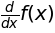

In [225]:
f, g = symbols('f g', cls=Function)
f(x)
f(x).diff(x)

To represent the differential equation $f′′(x)−2f′(x)+f(x)=sin(x)$, we would thus use

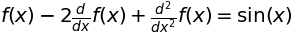

In [226]:
diffeq = Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sin(x))
diffeq

In [228]:
# To solve the ODE, pass it and the function to solve for to dsolve.
dsolve(diffeq, f(x))

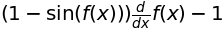

In [230]:
# dsolve returns an instance of Eq. This is because in general, 
# solutions to differential equations cannot be solved explicitly for the function.
eq = f(x).diff(x)*(1 - sin(f(x))) - 1
display(eq)
dsolve(eq, f(x))